# If Client Will Subscribe A Term Deposit Or Not

## Introduction
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
### Product Description
A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time. Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
### Dataset Description
<ol>
    <li>age: (numeric)
<li>job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<li>marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<li>education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<li>default: has credit in default? (categorical: 'no','yes','unknown')
<li>balance: amount in customer's bank account
<li>housing: has housing loan? (categorical: 'no','yes','unknown')
<li>loan: has personal loan? (categorical: 'no','yes','unknown')
<li>contact: contact communication type (categorical: 'cellular','telephone')
<li>month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<li>day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<li>duration: last contact duration, in seconds (numeric). 
<li>campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<li>previous: number of contacts performed before this campaign and for this client (numeric)
<li>poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<li>y - has the client subscribed a term deposit? (binary: 'yes','no') </ol>

### Goal
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


### Importing Libraries

In [1]:
#importing modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [2]:
train=pd.read_csv(r"C:\Users\asus\Downloads\train.csv",sep=';') #reading train dataset

In [3]:
test=pd.read_csv(r"C:\Users\asus\Downloads\test.csv", sep=';') #reading test dataset

In [4]:
bankmd=pd.concat([train,test],join='inner', ignore_index=True) #combining train and test dataset

In [5]:
bankmd.head() #getting peak of first five observations of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bankmd.tail() #getting peak of last five observations of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [7]:
bankmd.shape #checking shape of the dataset

(49732, 17)

The current dataset, after combining, has 49732 observations and 17 variables.

In [8]:
bankmd.info() #checking general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


The dataset has no null values. Out of 17 variables 10 has been read as object and 7 has been read as integers by Python. But here, the 'day' variable has read as integer which is incorrect.

In [9]:
bankmd['day']=pd.to_datetime(bankmd['day']) #Hence changing data type of day, from integer to datetime

In [10]:
bankmd.info() #rechecking general information after changing data type of day variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   age        49732 non-null  int64         
 1   job        49732 non-null  object        
 2   marital    49732 non-null  object        
 3   education  49732 non-null  object        
 4   default    49732 non-null  object        
 5   balance    49732 non-null  int64         
 6   housing    49732 non-null  object        
 7   loan       49732 non-null  object        
 8   contact    49732 non-null  object        
 9   day        49732 non-null  datetime64[ns]
 10  month      49732 non-null  object        
 11  duration   49732 non-null  int64         
 12  campaign   49732 non-null  int64         
 13  pdays      49732 non-null  int64         
 14  previous   49732 non-null  int64         
 15  poutcome   49732 non-null  object        
 16  y          49732 non-null  object       

The 'day' variable has been treated. Now the dataset can be proceeded further.

### Verifying Duplicates

In [11]:
bankmd.duplicated().sum() #checking if the dataset has any duplicate observations

4521

The dataset has 4521 duplicate observations.

In [12]:
bankmd.drop_duplicates(inplace=True) #dropping duplicates from the dataset

The duplicates has been dropped. 

In [13]:
bankmd.shape #checking the shape of the dataset

(45211, 17)

Now, the current dataset contains 45211 observations.

The dataset contains data of current and previous campaign. The variables 'pdays', 'previous' and 'poutcome' are the variables of the previous campaign.

The current campaign can be indentifid when the observations would contain :
<ol><li>pdays    - '-1'
    <li>previous - '0'
    <li>poutcome - 'unknown'</ol>
Now, classifying the dataset into current and previous dataset for further processing.


#### Creating Dataset of Current & Previous Campaign

In [14]:
c_campaign=bankmd.copy(deep=True) #creating copy for current campaign
p_campaign=bankmd.copy(deep=True) #creating copy for previous campaign

##### Current Campaign

In [15]:
c_campaign=c_campaign[c_campaign['pdays']==-1] #dataset with values only pdays equal to -1
c_campaign=c_campaign[c_campaign['previous']==0] #dataset with values only previous equals to 0
c_campaign=c_campaign[c_campaign['poutcome']=='unknown'] #dataset with only poutcome equals to unknown

In [16]:
c_campaign.drop(columns=['pdays','previous','poutcome'],inplace=True) #dropping unnecessary columns

In [17]:
c_campaign.shape #checking shape of the current campaign dataset

(36954, 14)

The current campaign dataset contains 36954.

###### Checking The 'unknown' values in the Dataset

In [18]:
c_campaign[c_campaign['job']=='unknown'] #checking presence of unknown values in variable job

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
4,33,unknown,single,unknown,no,1,no,no,unknown,1970-01-01 00:00:00.000000005,may,198,1,no
216,47,unknown,married,unknown,no,28,no,no,unknown,1970-01-01 00:00:00.000000005,may,338,2,no
354,59,unknown,divorced,unknown,no,27,no,no,unknown,1970-01-01 00:00:00.000000005,may,347,3,no
876,37,unknown,single,unknown,no,414,yes,no,unknown,1970-01-01 00:00:00.000000007,may,131,1,no
1072,29,unknown,single,primary,no,50,yes,no,unknown,1970-01-01 00:00:00.000000007,may,50,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43653,77,unknown,married,unknown,no,397,no,no,telephone,1970-01-01 00:00:00.000000007,may,300,3,yes
44017,57,unknown,married,primary,no,1884,no,no,telephone,1970-01-01 00:00:00.000000028,jun,133,4,no
44681,55,unknown,married,primary,no,159,no,no,unknown,1970-01-01 00:00:00.000000004,sep,15,1,no
44714,45,unknown,married,tertiary,no,406,no,no,cellular,1970-01-01 00:00:00.000000007,sep,314,1,yes


The 'job' variable in the dataset contains unknown values.

In [19]:
c_campaign[c_campaign['marital']=='unknown'] #checking presence of unknown values in variable marital

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


The 'marital' variable in the dataset does not contain unknown values.

In [20]:
c_campaign[c_campaign['education']=='unknown'] #checking presence of unknown values in variable education

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1970-01-01 00:00:00.000000005,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1970-01-01 00:00:00.000000005,may,198,1,no
13,58,technician,married,unknown,no,71,yes,no,unknown,1970-01-01 00:00:00.000000005,may,71,1,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,1970-01-01 00:00:00.000000005,may,98,1,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,1970-01-01 00:00:00.000000005,may,22,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44804,32,student,single,unknown,no,0,no,no,unknown,1970-01-01 00:00:00.000000015,sep,7,1,no
44816,35,management,married,unknown,no,2326,yes,yes,cellular,1970-01-01 00:00:00.000000016,sep,319,1,yes
44823,20,student,single,unknown,no,2785,no,no,cellular,1970-01-01 00:00:00.000000016,sep,327,2,yes
44871,37,blue-collar,single,unknown,no,217,no,no,cellular,1970-01-01 00:00:00.000000023,sep,272,2,yes


The 'education' variable in the dataset contains unknown values.

In [21]:
c_campaign[c_campaign['default']=='unknown'] #checking presence of unknown values in variable default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


The 'marital' variable in the dataset does not contain unknown values.

In [22]:
c_campaign[c_campaign['housing']=='unknown'] #checking presence of unknown values in variable housing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


The 'marital' variable in the dataset does not contain unknown values.

In [23]:
c_campaign[c_campaign['loan']=='unknown'] #checking presence of unknown values in variable loan

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


The 'marital' variable in the dataset does not contain unknown values.

In [24]:
c_campaign[c_campaign['contact']=='unknown'] #checking presence of unknown values in variable contact

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1970-01-01 00:00:00.000000005,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1970-01-01 00:00:00.000000005,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1970-01-01 00:00:00.000000005,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1970-01-01 00:00:00.000000005,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1970-01-01 00:00:00.000000005,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45027,39,services,single,secondary,no,471,no,no,unknown,1970-01-01 00:00:00.000000015,oct,5,1,no
45061,30,self-employed,single,secondary,no,1031,no,no,unknown,1970-01-01 00:00:00.000000020,oct,7,1,no
45062,58,retired,married,primary,no,742,no,no,unknown,1970-01-01 00:00:00.000000020,oct,5,1,no
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,1970-01-01 00:00:00.000000026,oct,17,1,no


The 'contact' variable in the dataset contains unknown values.

After checking the 'unknown' values in the dataset it can be seen that the dataset has three variables which contain the 'unknown' vaues, namely 'job','education' and 'contact'.<ol>
    <li>job - The subscription of the product can depend on the client's job, without the knowledge of his profession, marketing will be uneasy. Hence the uknown variables in this variable must be dropped.
        <li>educaion - The education of the client affects the subscription of the product, without knowing the education, marketing will be uneasy. Hence the unknown values in this variable must be dropped.
         <li>contact - The subsription of product does not rely on the means of contact but the duration of the contact, since the duration is given, dropping this variable will not help much.

In [25]:
c_campaign['job'].replace('unknown',np.nan,inplace=True) #replacing the unknown values in job variable with nan values
c_campaign['education'].replace('unknown',np.nan,inplace=True)#replacing the unknown values in educaton variable with nan values

In [26]:
c_campaign.isnull().sum() #checking the null values after replacing with the unknown values

age             0
job           255
marital         0
education    1534
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
y               0
dtype: int64

In [27]:
c_campaign.dropna(axis=0,inplace=True) #dropping the null values from the dataset

In [28]:
c_campaign.shape #checking shape after dropping null values

(35281, 14)

The current campaign dataset is ready to proceed for further analysis.

##### Previous Campaign

In [29]:
p_campaign=p_campaign[p_campaign['pdays']!=-1] #dataset with values only pdays not equals to -1
p_campaign=p_campaign[p_campaign['previous']!=0] #dataset with values only previous not equals to -1
p_campaign=p_campaign[p_campaign['poutcome']!='unknown'] #dataset with values only poutcome not equals to -1

In [30]:
p_campaign.shape #shape of the previous campaign

(8252, 17)

The previous campaign dataset has been filtered from the previous dataset.

### Current Campaign

#### DIstribution And Outliers

In [31]:
c_campaign.head() #peek of the first five observations

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1970-01-01 00:00:00.000000005,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1970-01-01 00:00:00.000000005,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1970-01-01 00:00:00.000000005,may,76,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,1970-01-01 00:00:00.000000005,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,1970-01-01 00:00:00.000000005,may,217,1,no


##### Varialbles Before Transformation

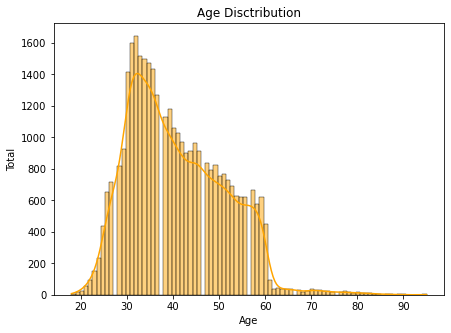

In [32]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable
sns.histplot(data=c_campaign['age'],kde=True,color='orange')
plt.title("Age Disctribution") 
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

In [33]:
c_campaign.age.skew() #checking skewness of the variable

0.6161139918175859

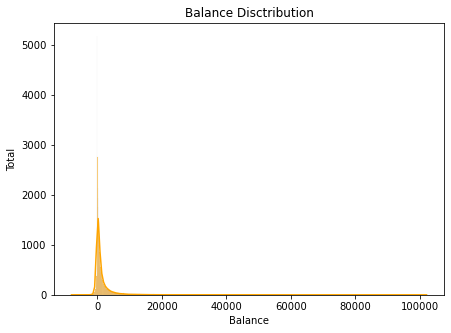

In [34]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable
sns.histplot(data=c_campaign['balance'],kde=True,color='orange')
plt.title("Balance Disctribution")
plt.xlabel('Balance')
plt.ylabel('Total')
plt.show()

In [35]:
c_campaign.balance.skew() #checking skewness of the variable

8.451763998662019

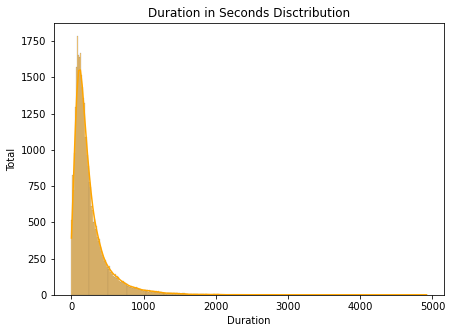

In [36]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable
sns.histplot(data=c_campaign['duration'],kde=True,color='orange')
plt.title("Duration in Seconds Disctribution")
plt.xlabel('Duration')
plt.ylabel('Total')
plt.show()

In [37]:
c_campaign.duration.skew() #checking skewness of the variable

3.2610902166618616

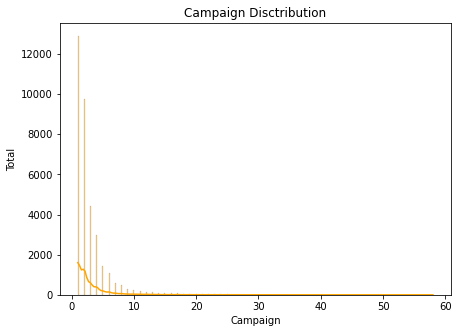

In [38]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable
sns.histplot(data=c_campaign['campaign'],kde=True,color='orange')
plt.title("Campaign Disctribution")
plt.xlabel('Campaign')
plt.ylabel('Total')
plt.show()

In [39]:
c_campaign.campaign.skew() #checking skewness of the variable

4.58062128457041

Since, the variables of the dataset has negative values, cube root transformation would be a better approach to handle the skewness of the data.

##### Variables After Cube Root Transformation

In [40]:
age_cbrt=np.cbrt(c_campaign['age']) #cube root transformation of the variable
age_cbrt.skew() #checking skewness of the variable

0.24860229983957272

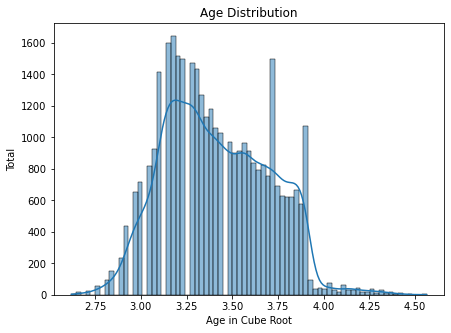

In [41]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable after cube root transformation
sns.histplot(data=age_cbrt,kde=True)
plt.title("Age Distribution")
plt.xlabel('Age in Cube Root')
plt.ylabel('Total')
plt.show()

In [42]:
balance_cbrt=np.cbrt(c_campaign['balance']) #cube root transformation of the variable
balance_cbrt.skew() #checking skewness of the variable

-0.05462258996416195

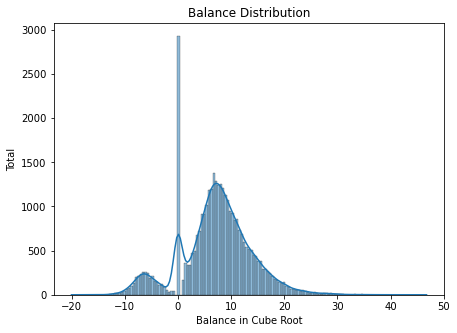

In [43]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable after cube root transformation
sns.histplot(data=balance_cbrt,kde=True)
plt.title("Balance Distribution")
plt.xlabel('Balance in Cube Root')
plt.ylabel('Total')
plt.show()

In [44]:
duration_cbrt=np.cbrt(c_campaign['duration']) #cube root transformation of the variable
duration_cbrt.skew() #checking skewness of the variable

0.6831847519620159

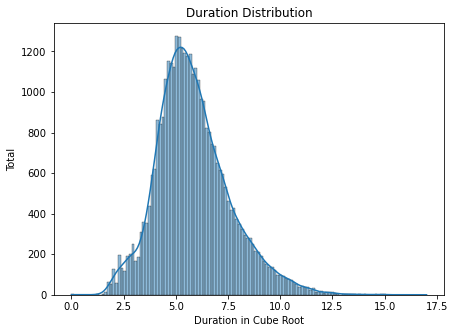

In [45]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable after cube root transformation
sns.histplot(data=duration_cbrt,kde=True)
plt.title("Duration Distribution")
plt.xlabel('Duration in Cube Root')
plt.ylabel('Total')
plt.show()

In [46]:
campaign_cbrt=np.cbrt(c_campaign['campaign']) #cube root transformation of the variable
campaign_cbrt.skew() #checking skewness of the variable

1.6043029780366664

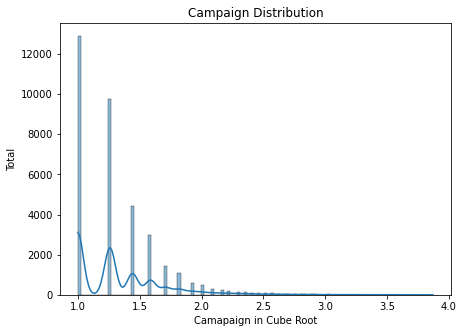

In [47]:
plt.figure(figsize=(7,5)) #plotting histogram to see the distribution and skewness of the variable after cube root transformation
sns.histplot(data=campaign_cbrt,kde=True)
plt.title("Campaign Distribution")
plt.xlabel('Camapaign in Cube Root')
plt.ylabel('Total')
plt.show()

###### Skewness Scale

|Range|Skewness|
|---|---|
|-0.5 to 0, 0 to 0.5|Fairly Symmetrical|
|-0.5 to -1, 0.5 to 1| Moderately Symmetrical|
|< -1, 1 > | Highly Skewed

###### Skewness Before & After Transformation

| Variables | Before Transformation | After Cube Root Transformation |
| --- | --- | --- |
| age | 0.61 | 0.24 |
| balance | 8.45 | -0.05 |
| duration | 3.26 | 0.68 |
| campaign | 4.58 | 1.60 |

75% of the numeric variables has been has turned to fairly symmetrical and moderately symmetrical, 25% of the variable is still highly skewed. In such cases, a non-parametric approach for further processing would be better. Here, the values after transformation is not taken for furhter processing.

#### Plotting graphs to see how the relation of customer of buying product varies

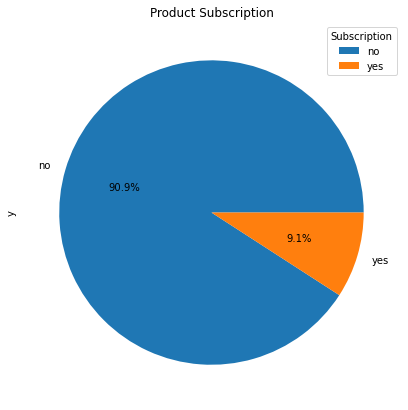

In [48]:
plt.figure(figsize=(7,7))  #plotting pie chat to see the percentage of products suscribed in the current campaign
c_campaign['y'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title('Product Subscription')
plt.legend(title='Subscription')
plt.show()

fter plotting pie chart for checking the percentage of products suscribed in this campaign, it is found that % of products has been suscribed in this campaign of total  marketing calls.

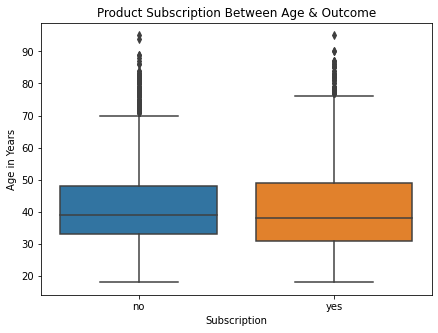

In [49]:
plt.figure(figsize=(7,5))  #plotting age and outcome into boxplot
sns.boxplot(data=c_campaign,x='y',y='age')
plt.title("Product Subscription Between Age & Outcome")
plt.xlabel('Subscription')
plt.ylabel('Age in Years')
plt.show()

Plotting Outcome and Age of the customer it can be seen that, 50% of customers who didn't suscribed the product are of age between 33 to 48. And 50% of customers who suscribed the product are of age between 32 to 50. 
From above results, we can say that we can not conlude if age between 30 to 50 is the actual reason of products not being suscribed because both subscibers and non-suscibers are following in this category. Hence another variable must be checked.

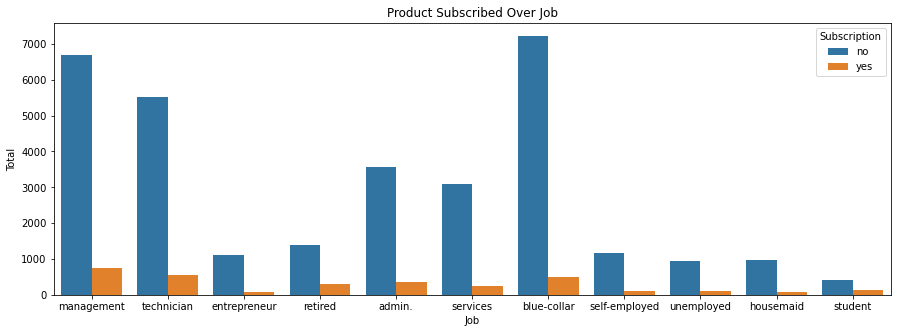

In [50]:
plt.figure(figsize=(15,5)) #plotting bar graph in job to product subscribed in all job segment
sns.countplot(x=c_campaign['job'],hue=c_campaign['y'])
plt.title('Product Subscribed Over Job')
plt.xlabel('Job')
plt.ylabel('Total')
plt.legend(title='Subscription')
plt.show()

From the results above, it is found that no specific interest has shown by any job segment to the product suscribed. However, the comparative percentage of 'retired', 'student' and 'unemployed' subscribing produducts are more.

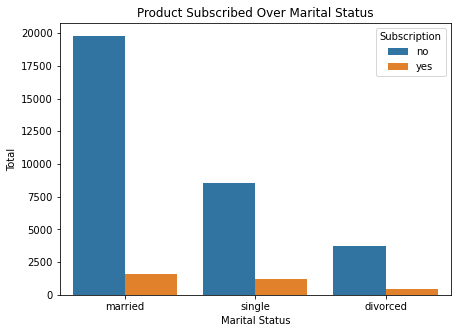

In [51]:
plt.figure(figsize=(7,5))    #plotting bar graph between marital status and outcome to see if product has subscribed
sns.countplot(x=c_campaign['marital'],hue=c_campaign['y'])
plt.title('Product Subscribed Over Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total')
plt.legend(title='Subscription')
plt.show()

After plotting bar graph between marital status and outcome to see if the product has been subscribed or not, it was seen that people who are married has shown more interest in subscribing the product, however, the percentage of single people subscribing the product are more.

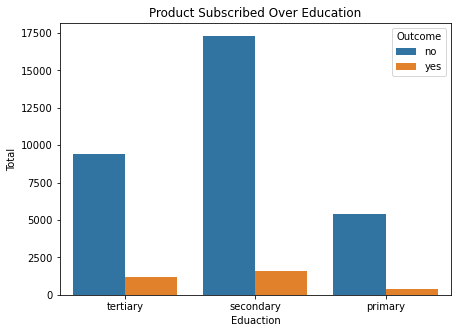

In [52]:
plt.figure(figsize=(7,5))   #plotting bar graph between education and outcome to see if it has affect product subscription
sns.countplot(x=c_campaign['education'],hue=c_campaign['y'])
plt.title('Product Subscribed Over Education')
plt.xlabel('Eduaction')
plt.ylabel('Total')
plt.legend(title='Outcome')
plt.show()

After plotting bar graph in between education and the outcome, it is found that people who has completed only secondary eucation has been made more calls and the people completing secodary education has more suscribers. However, the comparatively, the people who has completed tertiary education has shown more interest towrads subscribing product.

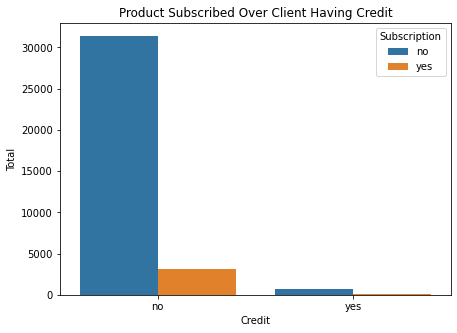

In [53]:
plt.figure(figsize=(7,5))   #plotting bar graph to between credit and outcome to see if products subscribed
sns.countplot(x=c_campaign['default'],hue=c_campaign['y'])
plt.title('Product Subscribed Over Client Having Credit')
plt.xlabel('Credit')
plt.ylabel('Total')
plt.legend(title="Subscription")
plt.show()

Plotting the graph between the credit and outcome, it can be seen that, the credit does not heavily affectng the subscribing of the product. Even after no credit, people are subscribing at good comparative scale.

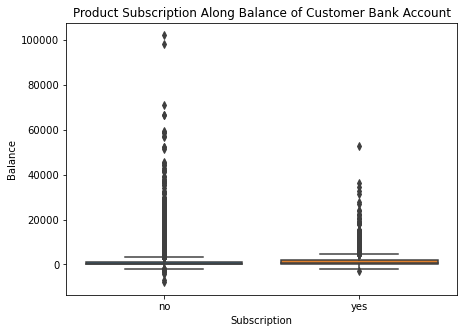

In [54]:
plt.figure(figsize=(7,5))    #plotting boxplot between Outcome and Balance to see if product subscribed
sns.boxplot(data=c_campaign,y='balance',x='y')
plt.title("Product Subscription Along Balance of Customer Bank Account")
plt.xlabel('Subscription')
plt.ylabel('Balance')
plt.show()

After plotting boxplot between outcome and balance, it is found that the customers who are having balance less than or close to zero are less likely to subscibe product. The customers with balance more than zero has shown more interest in subscribing product.

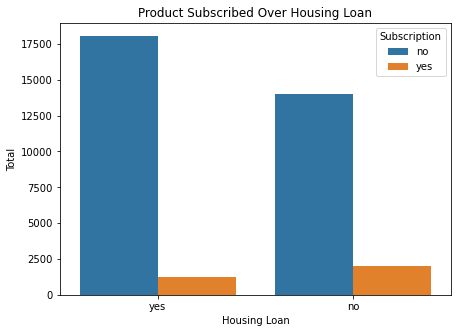

In [55]:
plt.figure(figsize=(7,5))  #plotting bar graph between housing loan and outcome to see if product subscribed
sns.countplot(x=c_campaign['housing'],hue=c_campaign['y'])
plt.title('Product Subscribed Over Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Total')
plt.legend(title='Subscription')
plt.show()

Plotting a bar graph between housing loan and the the outcome, it is seen that the people who are having the housing loan are not much interested in subscribing products while people with no housing loan has shown comparatively more interest in subscribing the product.

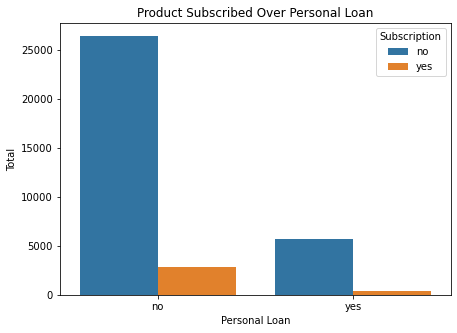

In [56]:
plt.figure(figsize=(7,5))    #plotting bar graph between personal loan and outcome to see if product subscribed
sns.countplot(x=c_campaign['loan'],hue=c_campaign['y'])
plt.title('Product Subscribed Over Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Total')
plt.legend(title='Subscription')
plt.show()

By plotting bar graph between personal loan and the outcome, it is seen that personal loans are less likely to affect the subscription of the product. The percentage of people subcribing product even after having personal loan or not, are around the same.

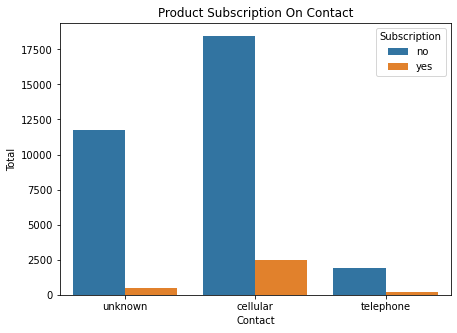

In [57]:
plt.figure(figsize=(7,5)) #plotting bar graph between contact and outcome to see if product subscribed or not
sns.countplot(x=c_campaign['contact'],hue=c_campaign['y'])
plt.title('Product Subscription On Contact')
plt.xlabel('Contact')
plt.ylabel('Total')
plt.legend(title='Subscription')
plt.show()

After plotting bar graph between contact and outcome, it is found that contacting by telephone or cellular brings similar results. The contact medium variable has not shown any difference in telephone and cellular.

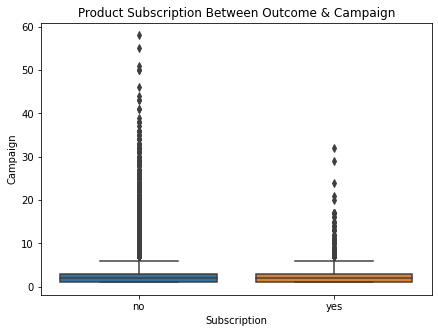

In [58]:
plt.figure(figsize=(7,5))   #plotting boxplot between Outcome and campaign to see if product subscribed
sns.boxplot(data=c_campaign,x='y',y='campaign')
plt.title("Product Subscription Between Outcome & Campaign")
plt.xlabel('Subscription')
plt.ylabel('Campaign')
plt.show()

After plotting boxplot between outcome and campaign, it is found that the products subscribed and the campaign are negatively correlated. Campaign aroud 2 has more number of people subscribing the product.

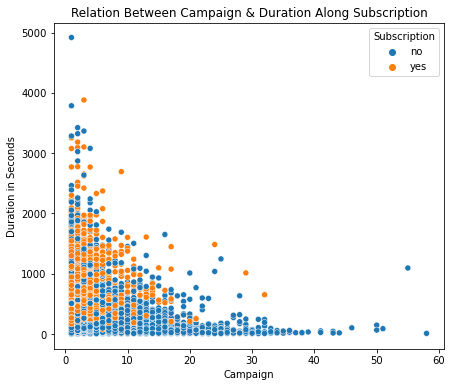

In [59]:
plt.figure(figsize=(7,6)) #plotting scatter plot between campaign and duration to see if see if product subscibed
sns.scatterplot(data=c_campaign,x='campaign',y='duration',hue='y')
plt.title('Relation Between Campaign & Duration Along Subscription')
plt.xlabel('Campaign')
plt.ylabel('Duration in Seconds')
plt.legend(title='Subscription')
plt.show()

After plotting scatter plot between campaign and duration of call made to the customer, along the outcome, it is found that the people with campaign less than 10 and the people with call duration more than 200 seconds are more likely to subscribe products.

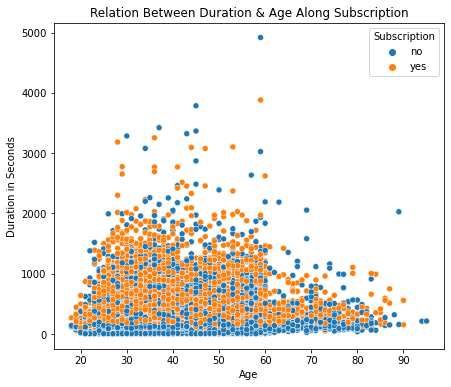

In [60]:
plt.figure(figsize=(7,6)) #plotting scatter plot between age and call duration to see if products subscribed or not
sns.scatterplot(data=c_campaign,x='age',y='duration',hue='y')
plt.title('Relation Between Duration & Age Along Subscription')
plt.xlabel('Age')
plt.ylabel('Duration in Seconds')
plt.legend(title='Subscription')
plt.show()

After plotting scatter plot between age and call duration in seconds, it is found that all age group has shown interest in subscribing the product when the call duration is more than 200 seconds.

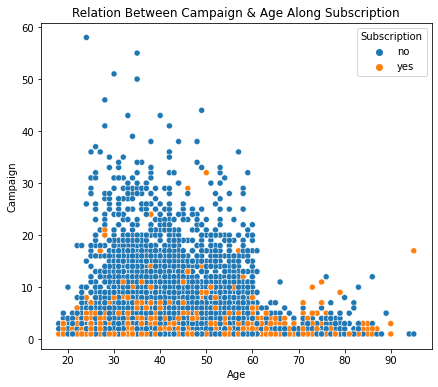

In [61]:
plt.figure(figsize=(7,6)) #plotting scatter plot between age and campaign to see if product subscribed
sns.scatterplot(data=c_campaign,x='age',y='campaign',hue='y')
plt.title('Relation Between Campaign & Age Along Subscription')
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.legend(title='Subscription')
plt.show()

After plotting scatter plot between age and campaign, it is found that most age cateogirs has shown interest in subscribing the product with the campaign less than 10.

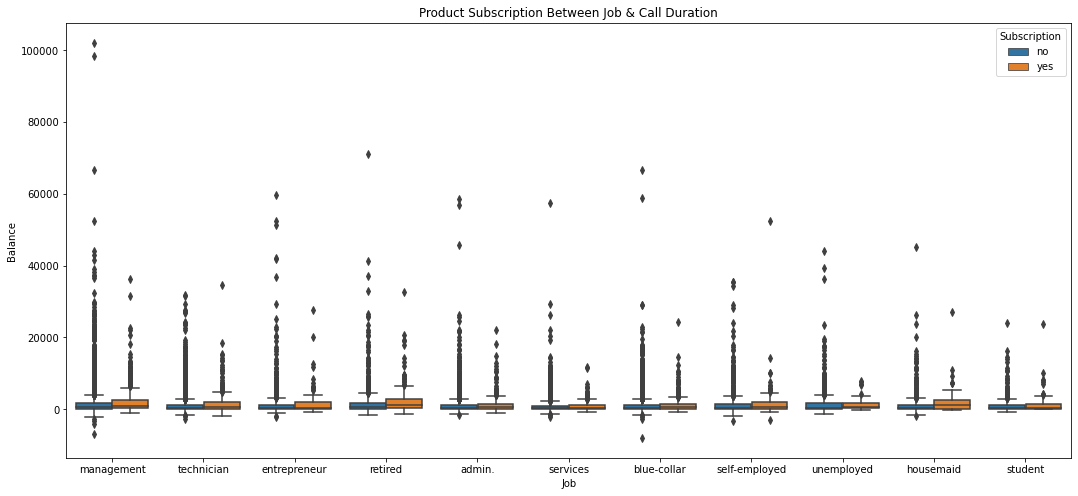

In [62]:
plt.figure(figsize=(18,8))  #plotting boxplot between jobs and call duration to see if product subscribed
sns.boxplot(data=c_campaign,x='job',y='balance',hue='y')
plt.title("Product Subscription Between Job & Call Duration")
plt.xlabel('Job')
plt.ylabel('Balance')
plt.legend(title='Subscription')
plt.show()

After plotting boxplot between balance and the jobs, it is found that all job segments have subscribed products when the balance of the client's bank account is more than 0.

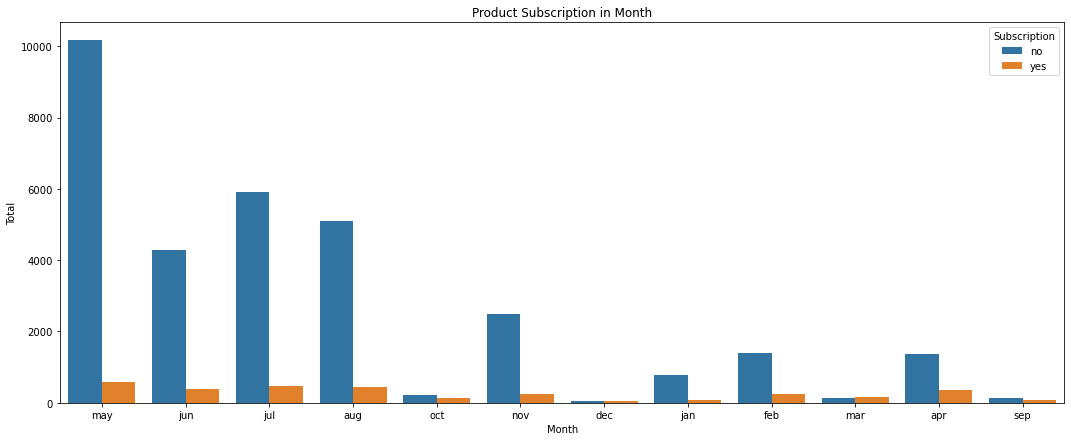

In [63]:
plt.figure(figsize=(18,7)) #plottng bar graph between month and outcome
sns.countplot(x=c_campaign['month'],hue=c_campaign['y'])
plt.title('Product Subscription in Month')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title="Subscription")
plt.show()

After ploting bar graph between month and outcome, it can be seen that most of the products has been subscribed in the month of May. Since the dataset has no information about the year, no proper time trend can been shown in the product outcome across months.

#### Outcome Of The Previous Campaign

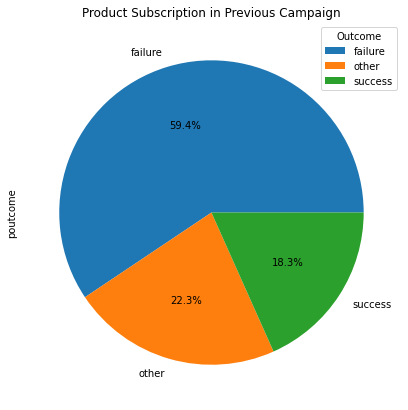

In [64]:
plt.figure(figsize=(7,7))  #plotting pie chat to see the percentage of products suscribed in this campaign with previous dataset
p_campaign['poutcome'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title('Product Subscription in Previous Campaign')
plt.legend(title='Outcome')
plt.show()

In the previous campaign, the success rate of the outcome, i.e., product subscription is more than the current campaign.

### Findings

After analysing the dataset, it is found that there are few variables on which the subscription or outcome of the product depends on.The variables are as follows:<ul>
    <li>balance  : The balance of the client affects the subscription of the product, balance more than 0 increases the chances of subscription.
    <li>campaign : The number of times a client has been contacted affects the subscription of the product, campaign less than 10 increases the chances of the subscription.
    <li>duration : The duration of the call to a client affects the subscription of the product, duration more than 200 seocnds increases the chances of product subscrption. </ul>
To ensure the subscription of the product, the meausres in the following variables must be taken care of,
<ol>
    <li>Balance  : The balance amount of the client bank balance must be greater tha zero.
    <li>Campaign : The campaign of contact with the clients should keep minimum(not less than 1).
    <li>Duration : The duration of contact with the clients should be focused and it should be more than 250 seocnds.</ol>
Apart from these key variables, the marketing call should be prioritized with the following,
<ul><li>Retired and students client
    <li>Clients with No personal and home loan
    <li>Clients with tertiary education

These are the factors that would decide if the client will subscribe a term deposit or not.

#### When key factors are taken into consideration

If the three key factors are followed during marketing, it would result into the following subscription of the product:

In [65]:
campaign=c_campaign.copy(deep=True)  #copying the c_campaign dataset 

In [66]:
campaign=campaign[campaign['balance']>=0]  #picking all the observations having balance more than zero

In [67]:
campaign=campaign[campaign['campaign']<=10] #picking all the observations having campaign less than ten

In [68]:
campaign=campaign[campaign['duration']>=200] #picking all the observations having duration more than 200 seconds

The new dataset bankmd_new has is ready with the variables and the factors that would give more subscribtion than the previous bankmd_drop dataset.

In [69]:
campaign.shape #checking the shape of the new dataset

(14099, 14)

The new dataset has 3013 observations and 17 variables.

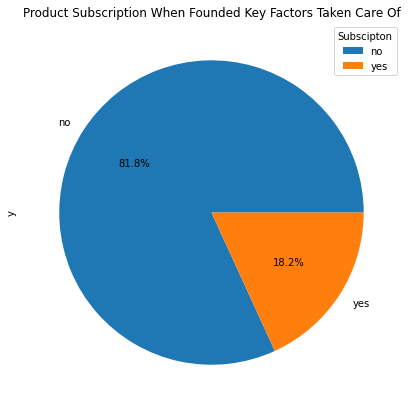

In [70]:
plt.figure(figsize=(7,7))  #plotting pie chat to see the percentage of products suscribed in this campaign with new dataset
campaign['y'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title('Product Subscription When Founded Key Factors Taken Care Of')
plt.legend(title='Subscipton')
plt.show()

After taking care of the measures of the variable, it can be seen that there has been a growth of 9.1%, from 9.1% to 18.2%, in the subscription of the products.